### CNN CLASIFICACION DOGS VS CATS CON AUMENTO DE DATOS

El sobreajuste esta causado por el hecho de tener demasiadas pocas muestras de las que aprender, que hace que seamos incapaces de entrenar un modelo que pueda generalizarse a datos nuevos. Si tuviesemos datos infinitos, el modelo estaria expuesto a todos los aspectos posibles de la distribucion de datos a mano: nunca se produciria el sobreajuste.

**El aumento de datos adopta un enfoque de generar mas datos de entrenamiento a partir de las muestras de entrenamiento existentes, aumentando las muestras mediante una cantidad de transformaciones aleatorias que producen imagenes con un aspecto creible. El objetivo es que, en el momento del entrenamiento, el modelo nunca vea la misma imagen exacta dos veces. Esto ayuda a exponer al modelo a mas aspectos de los datos y a generalizar mejor.**

En keras esto puede hacerse configurando un numero de transformacion aleatorias a realizar en las imagenes leiadas por la instancia ImageGenerator

Documentacion: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir='C:/Users/joaqu/Downloads/dogs-vs-cats-small/train'
validation_dir='C:/Users/joaqu/Downloads/dogs-vs-cats-small/validation'
test_dir='C:/Users/joaqu/Downloads/dogs-vs-cats-small/test'

Si entrenamos una red nueva utilizando esta configuracion de aumento de datos, la red nunca vera las mismas entradas dos veces. Pero las entradas que ve siguen estando muy interrelacionadas, puesto que vienen de un numero pequeño de imagenes originales.: no podemos producir informacion nueva, solo podemos remezclar informacion existente. Quiza esto no sea suficiente para eliminar por completo el sobreajuste. Para reducir aun mas el sobreajuste, vamos a agregar tambien una capa de dropout al modelo, justo antes del clasificador densamente conectado

In [5]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [7]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

#### ENTRENAR LA RED USANDO GENERADORES DE AUMENTO DE DATOS

In [8]:
#creamos unas instancia de ImageDataGenerator donde le pasamos las modificaciones (rotacion, deslizamiento, cizallamiento, zoom ) que
# queremos hacer sobre las imagenes.
train_datagen=ImageDataGenerator(
    rescale=1./225,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    
)

In [9]:
#creamos una instancia de ImageDataGenerator para el conjunto de validacion
test_dataget=ImageDataGenerator(rescale=1./255) #Los datos de validacion no deberian aumentarse!!

In [20]:
#Usamos el metodo flow_from_directory y le pasamos como parametro el directorio donde tenemos las imagenes de entrenamiento,
#el tamano de las imagenes de entrega, el tipo de clase, y el tamano del lote
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size=20)

Found 2000 images belonging to 2 classes.


In [21]:
validation_generator=test_dataget.flow_from_directory(validation_dir,target_size=(150,150),class_mode='binary',batch_size=20)

Found 1000 images belonging to 2 classes.


In [22]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 49s 489ms/step - loss: 0.6683 - acc: 0.5880 - val_loss: 0.6447 - val_acc: 0.6250
Epoch 2/100
100/100 [==============================] - 49s 485ms/step - loss: 0.6525 - acc: 0.6155 - val_loss: 0.6378 - val_acc: 0.5950
Epoch 3/100
100/100 [==============================] - 48s 484ms/step - loss: 0.6304 - acc: 0.6215 - val_loss: 0.5986 - val_acc: 0.6700
Epoch 4/100
100/100 [==============================] - 48s 483ms/step - loss: 0.6174 - acc: 0.6460 - val_loss: 0.5779 - val_acc: 0.7070
Epoch 5/100
100/100 [==============================] - 49s 494ms/step - loss: 0.6032 - acc: 0.6740 - val_loss: 0.5779 - val_acc: 0.7120
Epoch 6/100
100/100 [==============================] - 49s 490ms/step - loss: 0.6048 - acc: 0.6725 - val_loss: 0.5695 - val_acc: 0.6900
Epoch 7/100
100/100 [==============================] - 48s 481ms/step - loss: 0.5909 - acc: 0.6855 - val_loss: 0.5696 - val_acc: 0.7000
Epoch 8/100
100/100 [===========================

In [23]:
#Guardamos el modelo
model.save('Dogs-vs-cats-with-data-aumentation.h5')

Volvamos a trazar la perdida y la exactitud en el entrenmiento y la validacion

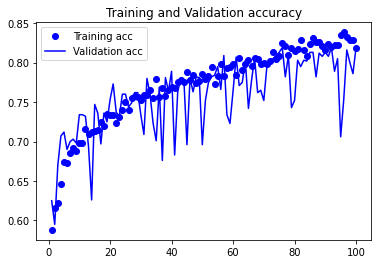

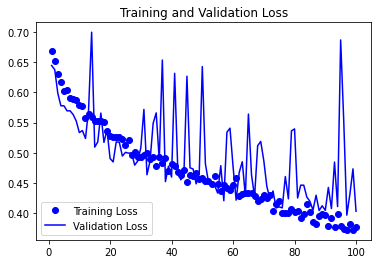

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

plt.show()

Gracias al dropout y al aumento de datos ya no estamos sobreajustando: las curvas de entrenamiento y validacion se acercan bastante.
Ahora tenemos una exactitud del 82%.validation_generator.

Al utilizar todavia mas tecnicas de regularizacion y ajustar los parametros de la red (como el numero de filtros por capa de convolucion o el nro de capas por red) puede que consigamos una exactitud cerca el 87%. Resultaria muy dificil conseguir mas solo con entrenar nuestra propia convnet desde cero, porque tenemos muy pocos datos con los que trabajar. El siguiente paso para mejorar nuestra exactitud sera utilizar un modelo preentrenado.


Podemos tomar unas imagenes de gatos del conjunto de pruebas y ver las predicciones del modelo:

In [28]:
from keras_preprocessing import image
import os


test_catdir='C:/Users/joaqu/Downloads/dogs-vs-cats-small/test/cats'

In [29]:
#Listas de rutas de imagenes
fnames=[os.path.join(test_catdir,fname) for fname in os.listdir(test_catdir)]

In [47]:
#veamos la ruta de la tercer imagen
fnames[2]

'C:/Users/joaqu/Downloads/dogs-vs-cats-small/test/cats\\cat.1502.jpg'

[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]


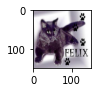

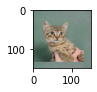

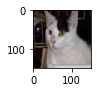

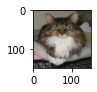

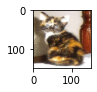

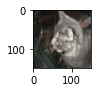

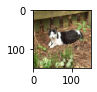

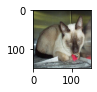

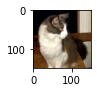

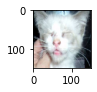

In [76]:
for i in range(1,11):

    img=image.load_img(fnames[i],target_size=(150,150))

    x=image.img_to_array(img)
    x=x.reshape((1,)+x.shape)
    print(model.predict(x))
    plt.figure()
    plt.subplot(2,5,i)
    plt.imshow(img) 
